In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
import warnings
warnings.filterwarnings("ignore")

In [200]:
dataset=pd.read_csv("loan.csv")

In [202]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [203]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

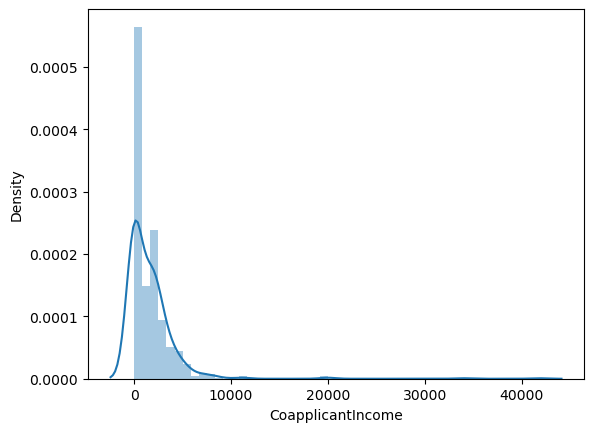

In [206]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [207]:
def outlier(col):
     q1,q3 =np.percentile(col,[25,75])
     iqr= q3-q1
     lw=q1-1.5*iqr
     uw=q3+1.5*iqr
     return lw,uw


In [208]:
outlier(dataset['CoapplicantIncome'])

(-3445.875, 5743.125)

In [209]:
lw,uw = wisker(dataset['CoapplicantIncome'])
dataset['CoapplicantIncome']=np.where(dataset['CoapplicantIncome']<lw,lw,dataset['CoapplicantIncome'])
dataset['CoapplicantIncome']=np.where(dataset['CoapplicantIncome']>uw,uw,dataset['CoapplicantIncome'])

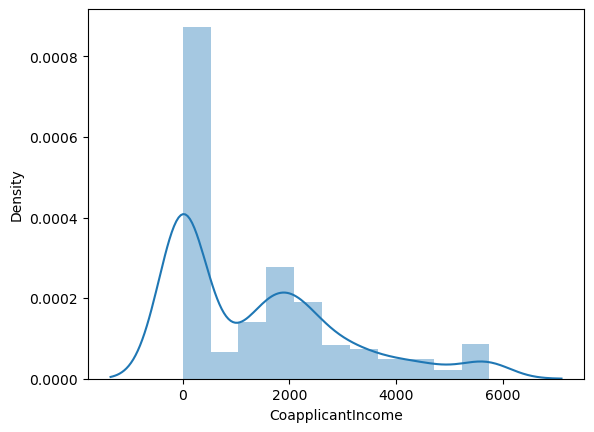

In [214]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [215]:
# from sklearn.preprocessing import FunctionTransformer
# ft=FunctionTransformer(func=np.log1p)

In [216]:
# ft.fit(dataset[['CoapplicantIncome']])

In [220]:
# dataset['CoapplicantIncome_ft']=ft.transform(dataset[['CoapplicantIncome']])

In [222]:
# plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.title('Before')
# sns.distplot(dataset['CoapplicantIncome'])
# plt.subplot(1,2,2)
# plt.title('After')
# sns.distplot(dataset['CoapplicantIncome_ft'])
# plt.show()

In [224]:
from sklearn.preprocessing import FunctionTransformer
ft1=FunctionTransformer(func= lambda x: x**2)

In [226]:
ft1.fit(dataset[['CoapplicantIncome']])

FunctionTransformer(func=<function <lambda> at 0x0000018DB91EB1A0>)

In [228]:
dataset['CoapplicantIncome_ft1']=ft1.transform(dataset[['CoapplicantIncome']])

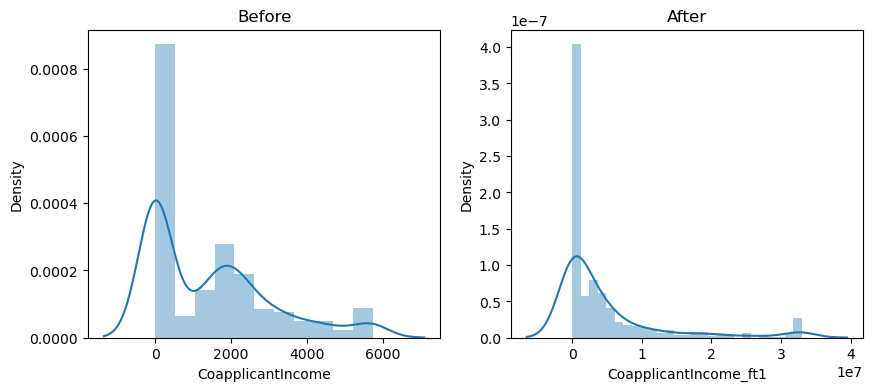

In [230]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(dataset['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(dataset['CoapplicantIncome_ft1'])
plt.show()